In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install resampy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.3 MB/s eta 0:00:00


In [ ]:
import seaborn as sns
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.backends.backend_svg
import tensorflow as tf
from matplotlib.pyplot import specgram
import matplotlib.pyplot as plt
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, Flatten, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
import resampy
from keras import regularizers
import os
import librosa
import glob
import scipy.io.wavfile
import resampy
%matplotlib inline

In [ ]:
mylist=[]
general_list = os.listdir('/content/drive/MyDrive/rawdata_new/')

In [ ]:
for item in general_list:
  if item[6:-16]=='03' or item[6:-16]=='04':
    mylist.append(item)

In [ ]:
feeling_list=[]
for item in mylist:
    if item[6:-16]=='01' and int(item[18:-4])%2==0:
        feeling_list.append('f_neutral')
    elif item[6:-16]=='01' and int(item[18:-4])%2==1:
        feeling_list.append('m_neutral')
    elif item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('f_calm')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('m_calm')
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('f_happy')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('m_happy')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('f_sad')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('m_sad')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('f_angry')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('m_angry')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('f_fearful')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('m_fearful')
    elif item[6:-16]=='07' and int(item[18:-4])%2==0:
        feeling_list.append('f_disgusted')
    elif item[6:-16]=='07' and int(item[18:-4])%2==1:
        feeling_list.append('m_disgusted')
    elif item[6:-16]=='08' and int(item[18:-4])%2==0:
        feeling_list.append('f_surprised')
    elif item[6:-16]=='08' and int(item[18:-4])%2==1:
        feeling_list.append('m_surprised')

In [ ]:
feeling_names = pd.unique(feeling_list)

In [ ]:
feeling_names = feeling_names.tolist()

In [ ]:
pd.unique(feeling_names)

array(['happy', 'sad'], dtype=object)

In [ ]:
len(mylist), len(feeling_list)

(752, 752)

In [ ]:
import keras.utils as image

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))

    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

x = []
y = []

In [ ]:
for feeling in feeling_names:
    images, labels = load_images_from_path('/content/drive/MyDrive/spectrograms/'+feeling, feeling[2:])

    x += images
    y += labels

FileNotFoundError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

lb = LabelEncoder()

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = np_utils.to_categorical(lb.fit_transform(y_train))
y_test_encoded = np_utils.to_categorical(lb.transform(y_test))

In [ ]:
K.clear_session()
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=20, epochs=20)

Epoch 1/20
27/27 [==============================] - 15s 87ms/step - loss: 0.7804 - accuracy: 0.5513 - val_loss: 1.2184 - val_accuracy: 0.5000
Epoch 2/20
27/27 [==============================] - 2s 57ms/step - loss: 0.7255 - accuracy: 0.5228 - val_loss: 0.7009 - val_accuracy: 0.5000
Epoch 3/20
27/27 [==============================] - 1s 52ms/step - loss: 0.6952 - accuracy: 0.5076 - val_loss: 0.6898 - val_accuracy: 0.5354
Epoch 4/20
27/27 [==============================] - 1s 53ms/step - loss: 0.6672 - accuracy: 0.6331 - val_loss: 0.6571 - val_accuracy: 0.6372
Epoch 5/20
27/27 [==============================] - 2s 61ms/step - loss: 0.6205 - accuracy: 0.6730 - val_loss: 0.6196 - val_accuracy: 0.6770
Epoch 6/20
27/27 [==============================] - 2s 60ms/step - loss: 0.5903 - accuracy: 0.6901 - val_loss: 0.5870 - val_accuracy: 0.6991
Epoch 7/20
27/27 [==============================] - 2s 57ms/step - loss: 0.5111 - accuracy: 0.7529 - val_loss: 0.6161 - val_accuracy: 0.6681
Epoch 8/20
2

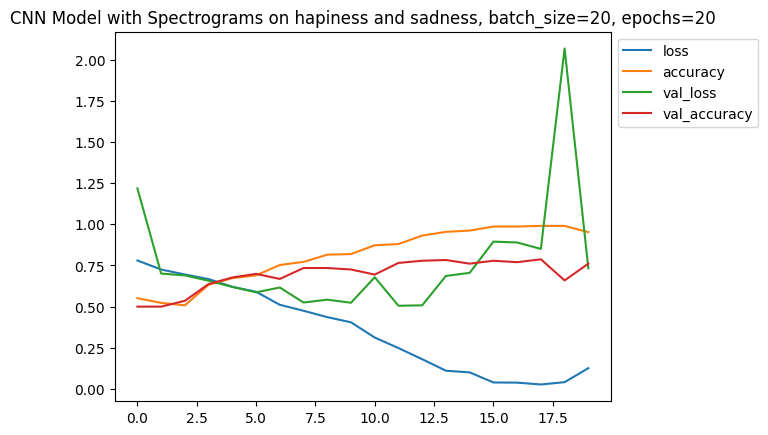

In [ ]:
logs = pd.DataFrame(hist.history)
logs.plot();
plt.title('CNN Model with Spectrograms on hapiness and sadness, batch_size=20, epochs=20');
plt.legend(bbox_to_anchor = [1,1]);

In [ ]:
model.save('/content/drive/MyDrive/spectogram_new_model.h5')

[]

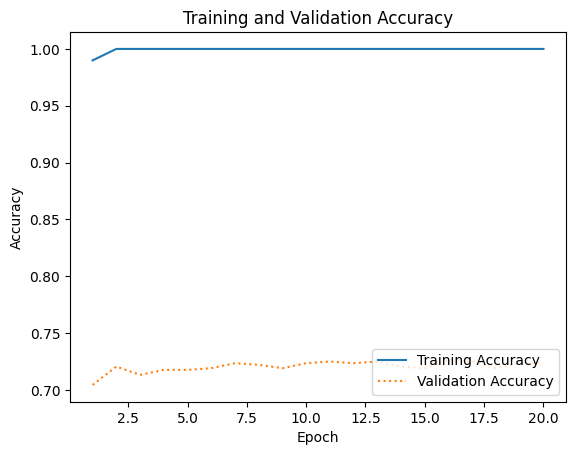

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

y_predicted = model.predict(x_testcnn)
mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))
class_labels = ['happy', 'sad']

plt.figure(figsize=(8,8))
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('MobileNetV2 on New Model, batch_size=20, epochs=20 Confusion Matrix')
plt.xlabel('Predicted label');
plt.ylabel('Actual label');

NameError: ignored

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x_train_norm = preprocess_input(np.array(x_train))
x_test_norm = preprocess_input(np.array(x_test))

train_features = base_model.predict(x_train_norm)
test_features = base_model.predict(x_test_norm)

8/8 [==============================] - 1s 89ms/step


In [ ]:
K.clear_session()
model_2 = Sequential()
model_2.add(Flatten(input_shape=train_features.shape[1:]))
model_2.add(Dense(1024, activation='relu'))
model_2.add(Dense(2, activation='softmax'))
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist_2 = model_2.fit(train_features, y_train_encoded, validation_data=(test_features, y_test_encoded), batch_size=20, epochs=20)

Epoch 1/20
27/27 [==============================] - 2s 31ms/step - loss: 24.8040 - accuracy: 0.6198 - val_loss: 5.3873 - val_accuracy: 0.7389
Epoch 2/20
27/27 [==============================] - 0s 18ms/step - loss: 1.7618 - accuracy: 0.8745 - val_loss: 2.4970 - val_accuracy: 0.7655
Epoch 3/20
27/27 [==============================] - 1s 19ms/step - loss: 0.6620 - accuracy: 0.9163 - val_loss: 1.7342 - val_accuracy: 0.8186
Epoch 4/20
27/27 [==============================] - 0s 19ms/step - loss: 0.2739 - accuracy: 0.9487 - val_loss: 1.7256 - val_accuracy: 0.8230
Epoch 5/20
27/27 [==============================] - 0s 18ms/step - loss: 0.2804 - accuracy: 0.9487 - val_loss: 2.7616 - val_accuracy: 0.7832
Epoch 6/20
27/27 [==============================] - 1s 19ms/step - loss: 0.3839 - accuracy: 0.9354 - val_loss: 1.5468 - val_accuracy: 0.8363
Epoch 7/20
27/27 [==============================] - 0s 18ms/step - loss: 0.0428 - accuracy: 0.9905 - val_loss: 2.4177 - val_accuracy: 0.7965
Epoch 8/20
2

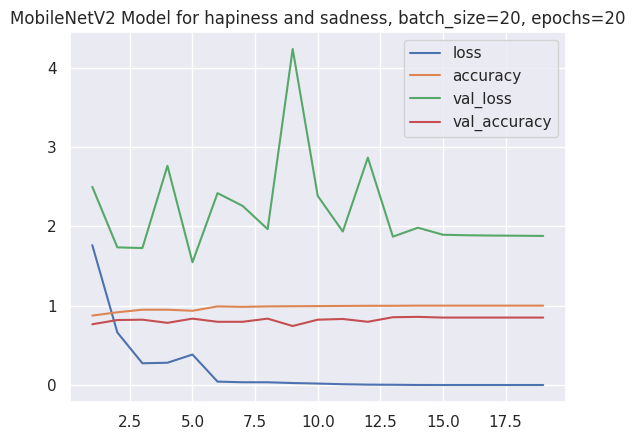

In [ ]:
logs_2 = pd.DataFrame(hist_2.history)
logs_2[1:].plot();
plt.title('MobileNetV2 Model for hapiness and sadness, batch_size=20, epochs=20');
plt.legend(bbox_to_anchor = [1,1]);


In [ ]:
new_feelings = pd.unique(y).tolist()
new_feelings

['happy', 'sad']

8/8 [==============================] - 0s 7ms/step


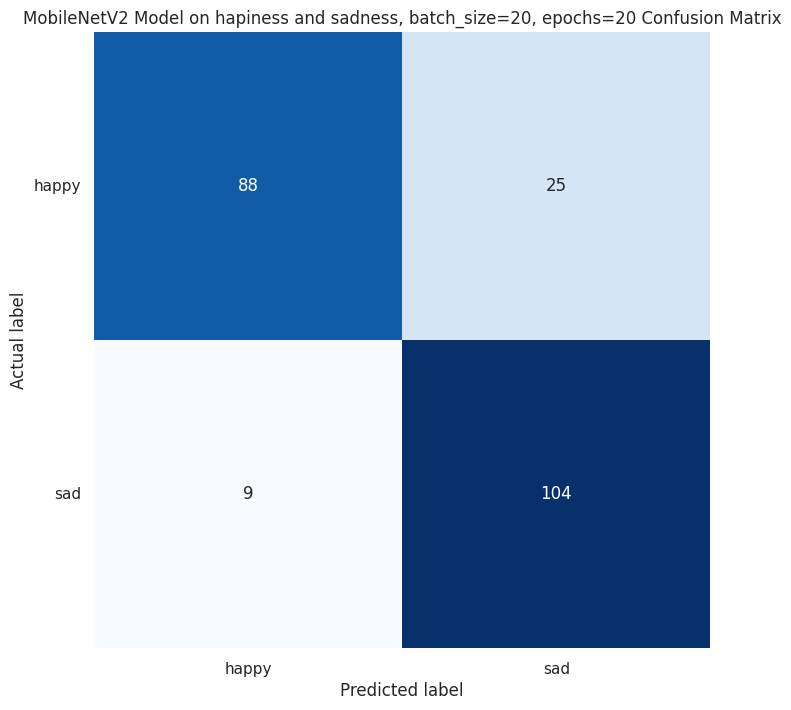

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

y_predicted = model_2.predict(test_features)
mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))
class_labels = new_feelings

plt.figure(figsize=(8,8))
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('MobileNetV2 Model on hapiness and sadness, batch_size=20, epochs=20 Confusion Matrix')
plt.xlabel('Predicted label');
plt.ylabel('Actual label');
plt.yticks(rotation=0);

In [ ]:
def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)

def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)

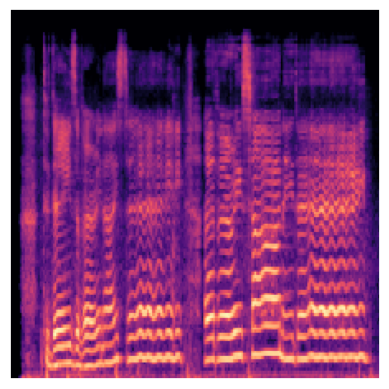

In [ ]:
create_spectrogram('/content/drive/MyDrive/happy_sing.wav', '/content/drive/MyDrive/happy_sing_sample.png')


x = image.load_img('/content/drive/MyDrive/happy_sing_sample.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

1/1 [==============================] - 0s 24ms/step


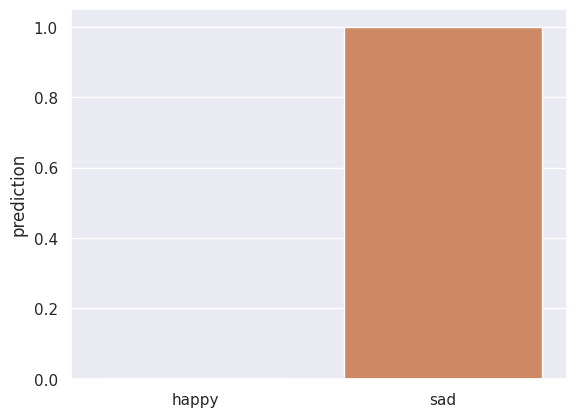

In [ ]:
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model.predict(x)
predictions = model_2.predict(y)

dictionary = {}
for i, label in enumerate(new_feelings):
    dictionary.update({label : predictions[0][i]})

df_new = pd.DataFrame.from_dict(dictionary, orient='index')
df_new.rename(columns={0 : 'prediction'}, inplace= True)
sns.barplot(data=df_new, x=df_new.index, y='prediction');